## Class project: Cross-Cultural Analysis of Generosity and the World Happiness Report
Cindy Mei, S&DS 123

## Introduction  

The key to happiness has long been a coveted secret, with higher happiness levels being linked to longer lives due to lower risk for heart disease, stress, and other health conditions such as diabetes and hypertension (Diener 2011). The annual World Happiness Report details a country's happiness score (collected by asking respondents to rate their life satisfaction on a scale) along with multiple other aggregated scores. Two such values are Generosity, which is a measure of charitable spirit in a country, and Freedom, or perceived ability to make life choices. In this project, I seek to explore the link between Generosity, Freedom, and happiness scores through a cross-cultural analysis. 

Social psychologist Geert Hofstede did extensive work with cross-cultural measurements with surveys, yielding a dataset called the "Six Dimensions" which provides insights of a country's culture. One of these was a measure of individuality (IDV), which is a measure of how individualist or collectivist a country tends to be with respect to culture. In collectivist cultures, people are encouraged to put one's family and community first over the wants of an individual. For example, the Dalai Lama, the leader of Buddhism (a religion practiced widely in many Asian collectivist countries) emphasizes that long-lasting happiness is achieved “through love, compassion, and generosity"; in individualist cultures, personal happiness and rights are placed above the needs of others: “the utilitarian doctrine is, that happiness is desirable, and the only thing desirable.” (Mill 1863). In addition, freedom of choice and expression is one of the hallmarks of individualist societies, and collectivist cultures value conformity and staying with the group as to not cause discord. 

In the past, there have been several analyses that have explored correlations between generosity, freedom, and happiness. For example, Park et al. found a scientific explanation on why generosity may increase happiness, as gift-giving activities increase activity in the striatum, part of the brain's reward system. In addition, it has been argued that cultures with higher freedom scores usually have higher happiness scores due to greater degrees of choice and fulfillment to pursue one's wishes (Brule 2014). However, how does culture affect how these factors correlate with happiness scores, given the different philosophies of individualist and collectivist cultures? (e.g. Is there less correlation of freedom scores and happiness in collectivist cultures compared to individualist cultures? Similarly, is there a higher correlation of generosity and happiness in collectivist cultures compared to individualist cultures?) Finally, which factor has a higher correlation in each society? These are important questions to consider, as each society may have different "keys" to how happiness is achieved that cannot be grouped through one lens (as the current one is individualist-centered). 

I obtained the 2015 World Happiness Dataset from Sustainable Development Solutions Network on Kaggle (https://www.kaggle.com/datasets/unsdsn/world-happiness), and measures of individualism scores based on Hofstede's cultural dimensions theory were obtained from https://geerthofstede.com/research-and-vsm/dimension-data-matrix/, which were published in 2015). To make the Geopandas map, I obtained measures of longitude and latitude from https://www.kaggle.com/datasets/franckepeixoto/countries and isocodes from https://www.kaggle.com/datasets/juanumusic/countries-iso-codes.







## Data wrangling: Merging the World Happiness Report with Geo Coordinates and Hofstede's IDV Scores


In order to get my code in shape, I downloaded the World Happiness Report CSV file from Kaggle and imported it in Jupyter as a csv, creating a new data file with the relevant columns (country name, happiness score, and the generosity scores), naming it "world_happiness_report_2015_cleaned." Afterwards, I imported the dataset from Geert Hofstede's cultural dimensions, which required a bit more cleaning than the previous file. After I imported these datasets, I merged the two datasets by country name, along with their 3-letter country isocodes and cultural classification, to form the master dataframe to be used in data visualization.



#### Codebook

- `Country`: the country of interest

- `Happiness Score`: happiness score collected by asking respondents to rate life satisfaction on a scale from 1 (low) to 10 (high)

- `Freedom`: measure of responses to “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

- `Generosity`: average response to "Have you donated to a charity in the past month?"

- `idv`: measure of individuality from 1 (low) to 100 (high). 

- `Longitude`: longitude of country

- `Latitude`: latitude of country

- `Alpha-3 Code`: three-letter isode of country

- `Cultural Classification`: Whether a country would be considered individualist (IDV >= 50) or collectivist (IDV < 50).

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as geo
import plotly.express as plx
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import scipy.stats as stats

# import 6 Dimensions, Isocodes, Latitude/Longitude, and World Happiness Report datasets.

sixdimensions2015 = pd.read_csv ("sixdimensions2015.csv", sep =';')
isocodes = pd.read_csv ("wikipedia-iso-country-codes.csv")[["English short name lower case", "Alpha-3 code"]]
latlong = pd.read_csv ("countries.csv")
world_happiness_report_2015 = pd.read_csv ("2015.csv")


isocodes_1 = isocodes.replace ("United States Of America", "United States").replace ("Korea, Republic of (South Korea)", "South Korea").replace ("Lao People's Democratic Republic", "Laos").replace ("Macedonia, the former Yugoslav Republic of", "North Macedonia").replace ("Moldova, Republic of", "Moldova").replace ("Tanzania, United Republic of", "Tanzania")
isocodes_1.head()


,English short name lower case,Alpha-3 code
0,Afghanistan,AFG
1,Åland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


In this cell, I imported all the necessary packages and datasets. I also replaced common alternative names of countries (e.g. United States Of America to United States) and kept those names consistent throughout my data so that joins and merges would be able to recognize that they were referring to the same countries.

In [101]:
# merge datasets and update names

world_happiness_report_2015_codes = world_happiness_report_2015.merge (isocodes_1, left_on = "Country",
                                                                       right_on = "English short name lower case")
world_happiness_report_2015_cleaned = world_happiness_report_2015_codes [["Country", "Freedom", "Happiness Score", "Generosity", "Alpha-3 code"]].replace ("Somaliland region", "Somalia").replace ("North Cyprus", "Cyprus")
latlong_updated = latlong.replace ("US", "United States").replace ("Czechia", "Czech Republic").replace ("Taiwan*", "Taiwan").replace ("Korea, South", "South Korea").replace ("Dominican Rep", "Dominican Republic")
data_pd1 = world_happiness_report_2015_cleaned.merge (latlong_updated, on = "Country")
data_w_africa = data_pd1.replace ("Kenya", "Africa East").replace ("Tanzania", "Africa East").replace ("Ethiopia", "Africa East").replace ("Zambia", "Africa East").replace ("Ghana", "Africa West").replace("Nigeria", "Africa West").replace ("Sierra Leone", "Africa West")
data_pd2 = data_w_africa.replace ("Saudi Arabia", "Arab countries").replace ("Egypt", "Arab countries").replace ("Iraq", "Arab countries").replace ("Lebanon", "Arab countries").replace ("Libya", "Arab countries").replace ("Kuwait", "Arab countries").replace ("United Arab Emirates", "Arab countries")


Here, I merged all of the datasets together so that the countries would have the World Happiness Report data, isocodes, Hofstede data, and their coordinates (latitude and longitude). I also had to make modifications to prepare for joining the Hofstede data because he grouped many different African/Middle Eastern countries under "Africa East", "Africa West", and "Arab countries", respectively (source for these groupings: https://core.ac.uk/download/pdf/234624945.pdf) While countries such as Tanzania were changed to "Africa East", the integrity of the country is preserved with the isocode and the coordinates, and will still appear on the geomap in the correct place. 

In [102]:
# remove rows with #NULL! values for IDV and wrangle 6 Dimensions dataset
six_dimensions_null = sixdimensions2015.replace('#NULL!', np.nan)
six_dimensions_cleaned= six_dimensions_null[six_dimensions_null['idv'].notna()]
six_dimensions_rename = six_dimensions_cleaned.replace ("Czech Rep", "Czech Republic").replace ("Great Britain", "United Kingdom").replace ("Korea South", "South Korea").replace ("U.S.A.", "United States").replace ("Slovak Rep", "Slovakia").replace ("South Africa white", "South Africa")
six_dimensions_final = six_dimensions_rename [["country", "idv"]]


Some of the Hofstede data had no information on the individuality score of a country - in this cell, I removed the rows in which IDV was equal to #NULL! by equating them to NA and dropping the rows with NA. Finally, I removed the rest of the columns, only keeping the relevant "country" and "idv" columns to be merged onto the rest of the dataset. 

In [103]:
# merge Hofstede data with positional informational, cultural classifications, and Happiness Score data

data_pd3 = data_pd2.merge (six_dimensions_final, left_on = "Country", right_on = "country")
data_pd_final = data_pd3 [["Country", "Happiness Score", "Freedom", "Generosity", "idv", "Longitude", "Latitude", "Alpha-3 code"]].copy()
data_pd_final.loc[:, "Cultural Classification"] = ["Individualist" if x >= 50 else "Collectivist" for x in data_pd_final.idv.astype(int)]
data_pd_final.head()

,Country,Happiness Score,Freedom,Generosity,idv,Longitude,Latitude,Alpha-3 code,Cultural Classification
0,Switzerland,7.587,0.66557,0.29678,68,8.231974,46.798562,CHE,Individualist
1,Denmark,7.527,0.64938,0.34139,74,10.333328,55.670249,DNK,Individualist
2,Norway,7.522,0.66973,0.34699,69,11.528036,64.573154,NOR,Individualist
3,Canada,7.427,0.63297,0.45811,80,-107.991707,61.066692,CAN,Individualist
4,Finland,7.406,0.64169,0.23351,63,25.920916,63.246778,FIN,Individualist


## Measuring Happiness, Individuality, Generosity, and Freedom Across the World
 
To visualize my data, I plotted measures of happiness, individuality, generosity, and freedom on choropleth maps, with a legend of the color map underneath each map. I also plotted multiple scatterplots using matplotlib to understand if there was any linear relationship in the context of individuality/collectivist cultures and whether these cultures affected the extent of the relationship numerically.


In [104]:
# see the Choropleth maps in the link that is in the Github README.

import plotly.io as pio
!pip install -U kaleido
world = geo.read_file(geo.datasets.get_path('naturalearth_lowres'))
fig = make_subplots(rows=2, cols=2, specs=[[{'type':'choropleth'}, {'type':'choropleth'}],
                                           [{'type':'choropleth'}, {'type':'choropleth'}]])

# creation of Choropleth maps, which are color-coded by happiness, generosity, individuality, and freedom.

fig.append_trace(go.Choropleth(
                    locations=data_pd_final['Alpha-3 code'], 
                    locationmode="ISO-3", 
                    z=data_pd_final['Happiness Score'],
                    colorscale="Viridis_r", 
                    legendgroup = 'Happiness Score',
                    colorbar=dict(orientation = "h", len=0.5, x=0.22, y=0.60, yanchor='top',
                                  title='Happiness Score', titleside = "bottom")),
              row=1, col=1)

fig.append_trace(go.Choropleth(
                    locations=data_pd_final['Alpha-3 code'], 
                    locationmode="ISO-3", 
                    z=data_pd_final['Generosity'],
                    colorscale="Viridis_r", 
                    legendgroup = "Generosity",
                    colorbar=dict(orientation = "h", len=0.5, x=0.78, y=0.60, yanchor='top',
                                  title='Generosity', titleside = "bottom")),
              row=1, col=2)

fig.append_trace(go.Choropleth(
                    locations=data_pd_final['Alpha-3 code'], 
                    locationmode="ISO-3", 
                    z=data_pd_final['idv'],
                    colorscale="Viridis_r", 
                    legendgroup = "IDV",
                    colorbar=dict(orientation = "h", len=0.5, x=0.22, y=0.02, yanchor='top', 
                                  title='Individuality', titleside = "bottom")),
                  row=2, col=1)

fig.append_trace(go.Choropleth(
                    locations=data_pd_final['Alpha-3 code'], 
                    locationmode="ISO-3", 
                    z=data_pd_final['Freedom'],
                    colorscale="Viridis_r", 
                    legendgroup = "Freedom",
                    colorbar=dict(orientation = "h", len=0.5, x=0.78, y=0.02, yanchor='top',
                                  title='Freedom', titleside = "bottom")),
                      row=2, col=2)
fig.update_layout(
    height=700,
    width=1050,
    title_text="World Happiness Scores",
    showlegend=False)
pio.write_image(fig, file='my_plot.pdf', format='pdf')
pio.write_html(fig, file='index.html', auto_open=True)

Firstly, I plotted visualizations using Geopandas maps (color-coded by a chosen variable) to see the distribution of these factors over the world. At first glance, it appears that the countries with the highest degrees of individuality also have the highest happiness scores (similarly-colored maps). However, this was not strictly the case (for example, Brazil has a high happiness score but a lower individuality score; Hungary has a low happiness score but a high individuality score). This suggests that there may be another factor in play here, and I began looking at this through a cross-cultural analysis. 

Text(0.5, 1.05, 'Paired Plots of Happiness Score, Freedom, and Generosity in Individualist/Collectivist Societies')

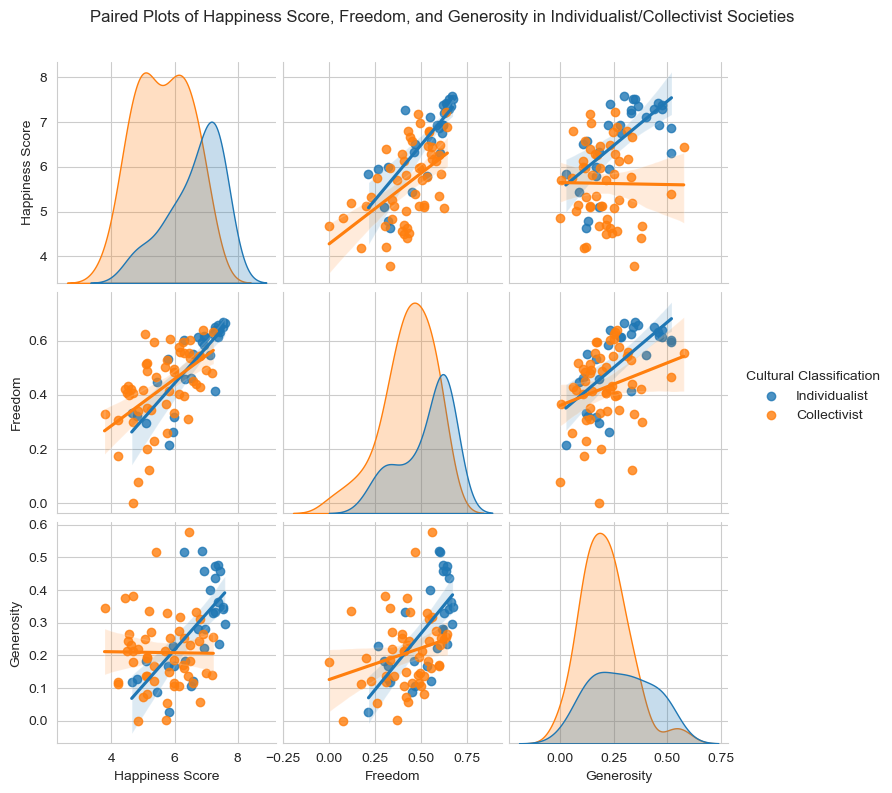

In [132]:
# create paired plots of the dataset to view correlations between variables

seaborn_pd = data_pd_final [["Happiness Score", "Freedom", "Generosity", "Cultural Classification"]]
g = sns.pairplot (seaborn_pd, kind = "reg", hue = "Cultural Classification")
g.fig.suptitle("Paired Plots of Happiness Score, Freedom, and Generosity in Individualist/Collectivist Societies",
               y = 1.05)


I next used Seaborn to plot a paired plot, which are used in statistics to visualize relationships between variables (in this case, happiness score, freedom, and generosity.) While it does not give exact numbers, it is an interesting visualization of the sorts of distributions that are happening. What jumped out immediately for me was the seemingly straight line in the relationship between generosity and happiness scores in collectivist cultures, as well as the similar slopes seen in the relationship between personal freedom and happiness across individualist and collectivist cultures. 

There's also some insight on univariate distribution in the variables. It seems that generally, there is a more uniform distribution of the variables in collectivist cultures, and the peaks are very high, indicating low variance in the data. In individualist cultures, a more negative-skewed distribution can be observed in happiness and freedom scores, with a more uniform distribution of generosity. All of the individualist distributions have lower peaks than those of collectivist cultures, indicating more variance. The uniform distributions and low variance in collectivist cultures indicate that most respondents answered similarly with moderate answers on the survey. The negative skew in the individualist countries suggests that the majority of respondents gave answers for high happiness and freedom scores, with few individualist countries that had low happiness and freedom scores.
 

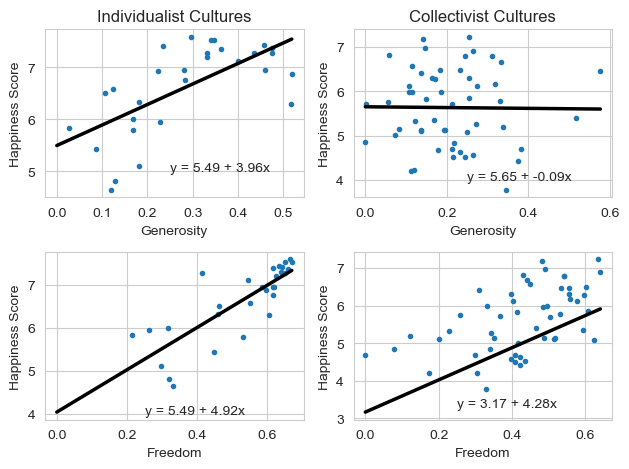

In [133]:
# create dataframes based on cultural classifications

ind_df = data_pd_final [data_pd_final.idv.astype (int) >= 50]
col_df = data_pd_final [data_pd_final.idv.astype (int) < 50]

# make subplots and add regression lines to illustrate relationships
# between happiness and generosity + happiness and freedom in cultural contexts

fig1, ax = plt.subplots(2, 2);
ax[0, 0].plot(ind_df ["Generosity"], ind_df["Happiness Score"], ".");
ax[0, 0].set_xlabel("Generosity");
ax[0, 0].set_ylabel("Happiness Score");
ax[0, 0].set_title ("Individualist Cultures")
b, a = np.polyfit(ind_df ["Generosity"], ind_df["Happiness Score"], deg=1)
xseq = np.linspace(0, max (ind_df["Generosity"]), num=100)
ax[0, 0].plot(xseq, a + b * xseq, color="k", lw=2.5)
ax[0, 0].text(0.25, 5, 'y = ' + '{:.2f}'.format(a) + ' + {:.2f}'.format(b) + 'x')

ax[0, 1].plot(col_df ["Generosity"], col_df["Happiness Score"], ".");
ax[0, 1].set_xlabel("Generosity");
ax[0, 1].set_ylabel("Happiness Score");
ax[0, 1].set_title ("Collectivist Cultures")
d, c = np.polyfit(col_df ["Generosity"], col_df["Happiness Score"], deg=1)
xseq1 = np.linspace(0, max (col_df["Generosity"]), num=100)
ax[0, 1].plot(xseq1, c + d * xseq1, color="k", lw=2.5)
ax[0, 1].text(0.25, 4, 'y = ' + '{:.2f}'.format(c) + ' + {:.2f}'.format(d) + 'x')

ax[1, 0].plot(ind_df ["Freedom"], ind_df["Happiness Score"], ".");
ax[1, 0].set_xlabel("Freedom");
ax[1, 0].set_ylabel("Happiness Score");
b1, a1 = np.polyfit(ind_df ["Freedom"], ind_df["Happiness Score"], deg=1)
xseq3 = np.linspace(0, max (ind_df["Freedom"]), num=100)
ax[1, 0].plot(xseq3, a1 + b1 * xseq3, color="k", lw=2.5)
ax[1, 0].text(0.25, 4, 'y = ' + '{:.2f}'.format(a) + ' + {:.2f}'.format(b1) + 'x')

ax[1, 1].plot(col_df ["Freedom"], col_df["Happiness Score"], ".");
ax[1, 1].set_xlabel("Freedom");
ax[1, 1].set_ylabel("Happiness Score");
c1, d1 = np.polyfit(col_df ["Freedom"], col_df["Happiness Score"], deg=1)
xseq4 = np.linspace(0, max (col_df["Freedom"]), num=100)
ax[1, 1].plot(xseq4, c1 + d1 * xseq4, color="k", lw=2.5)
ax[1, 1].text(0.25, 3.3, 'y = ' + '{:.2f}'.format(c1) + ' + {:.2f}'.format(d1) + 'x')

fig1.tight_layout()
plt.show()

I next examined these relationships with scatter plots that show the line of best fit, and the results I saw were interesting. It appears that in individualist cultures, the more generous a country is, the higher their happiness score--it is a positive correlation! However, in collectivist cultures, the level of happiness stays nearly constant at every level of generosity. This suggests that being generous in collectivist cultures is not tied to one's personal happiness--and this makes sense because collectivist cultures believe it is one's duty to spread harmony and contribute to society. The correlation between freedom and happiness scores in both individualist and collectivist cultures were positive, which also surprised me, as I expected that there would not be much correlation between freedom and happiness due to the value of conformity in collectivist cultures.

Text(0.5, 1.0, 'Correlation Heatmap of Variables in Collectivist Cultures')

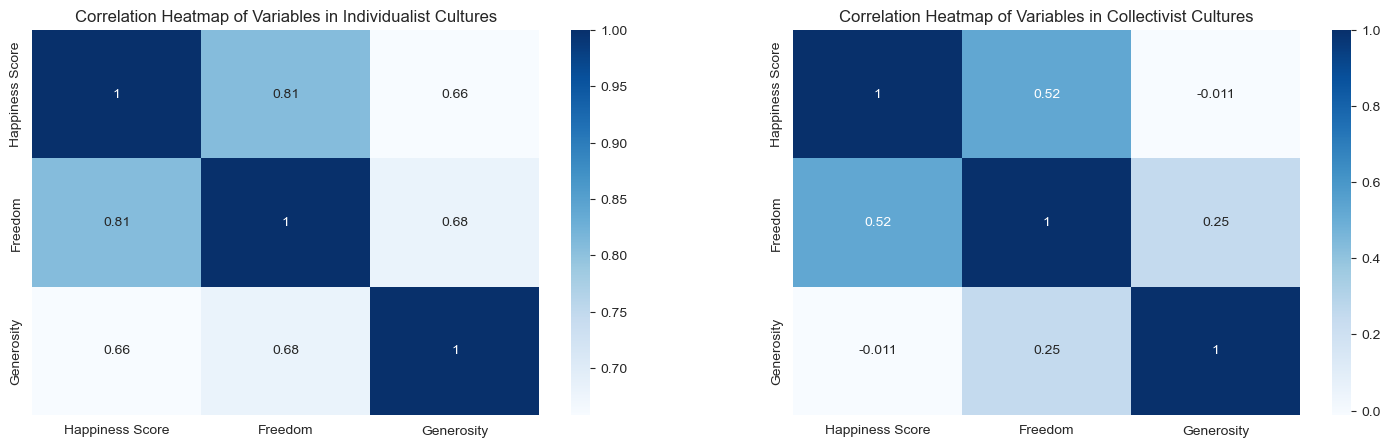

In [107]:
# Seaborn heatmaps illustrating correlation of variables within cultural context.

ind_sns = ind_df [["Happiness Score", "Freedom", "Generosity"]]
col_sns = col_df [["Happiness Score", "Freedom", "Generosity"]]
correlations_ind = ind_sns.corr()
correlations_col = col_sns.corr()
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
sns.heatmap (correlations_ind, annot = True, ax=axes[0], cmap = "Blues")
axes[0].set_title ("Correlation Heatmap of Variables in Individualist Cultures")
sns.heatmap (correlations_col, annot = True, ax=axes[1], cmap = "Blues")
axes[1].set_title ("Correlation Heatmap of Variables in Collectivist Cultures")


Lastly, I used Seaborn to visualize the correlation between variables in individualist and collectivist cultures using heatmaps. The strength of correlation between personal freedom and happiness scores, as well as between generosity and happiness scores, is higher in individualistic cultures compared to collectivist cultures. In fact, the correlation between generosity and happiness is extremely weak in collectivist cultures, which correlates with the previous inference I made from the scatter plots. There is a moderate correlation between happiness scores and personal freedom. While the positive correlation is weaker than in individualist cultures, the moderate strength implies that there is at least some degree of correlation, and much more than the correlation between generosity and happiness in collectivist cultures.

## Analyses: Panda Insights, Hypothesis Testing/Machine Learning Methods 


In [108]:
# Means of happiness, freedom, and generosity across cultures
pandas_df = data_pd_final [["Happiness Score", "Freedom", "Generosity", "Cultural Classification"]]
pd_means = pandas_df.groupby ("Cultural Classification").mean()
pd_means

,Happiness Score,Freedom,Generosity
Cultural Classification,,,
Collectivist,5.631264,0.426978,0.208906
Individualist,6.622931,0.525462,0.285890


In [109]:
# Medians of happiness, freedom, and generosity across cultures

pd_medians = pandas_df.groupby ("Cultural Classification").median()
pd_medians

,Happiness Score,Freedom,Generosity
Cultural Classification,,,
Collectivist,5.716,0.43450,0.19591
Individualist,6.937,0.59625,0.28214


I ran Pandas analyses on the means and medians of the given factors within the cultural context, and it appears that the means and medians of every factor is higher in individualist societies than collectivist societies. I recognized that a possible reason for this is that collectivist cultures tend to not to express extreme opinions so they will stay with the group and not stand out, while individualist cultures tend to be more outspoken about their attitudes (Triandis 1995).

### Hypothesis Testing

Given the results from data visualization, I was interested in exploring the factors further, and whether the differences in individualist vs. collectivist cultures are simply due to chance, which may change how I interpret the results in how they may influence happiness scores in both cultures.

#### Hypotheses (one set for each factor)

$H_0$: $\mu_{individualist} =  \mu_{collectivist}$   or    $H_0$: $\mu_{individualist} -  \mu_{collectivist} = 0$ 

$H_A$: $\mu_{collectivist} < \mu_{individalist}$    or    $H_0$: $\mu_{individualist} -  \mu_{collectivist} < 0$ 


Where each set of $\mu_{individualist}$ and $\mu_{collectivist}$ represents population mean measures for happiness score, generosity, and freedom for individualist and collectivist cultures, respectively.

In [131]:
# generating arrays of each measure

ind_hap = ind_df ["Happiness Score"]
col_hap = col_df ["Happiness Score"]
ind_gen = ind_df ["Generosity"]
col_gen = col_df ["Generosity"]
ind_free = ind_df ["Freedom"]
col_free = col_df ["Freedom"]

# in order to verify two-sample t-test can be used, the ratio needs to be smaller than 4:1, 
# which is the case here, so we can proceed with hypothesis testing

print(np.var(ind_hap), np.var(col_hap))
print(np.var(ind_gen), np.var(col_gen))
print(np.var(ind_free), np.var(col_free))





0.7092362711058261 0.7508952887148451
0.019638560537931036 0.012564594298469203
0.019101301292271104 0.02050038002128872


In [129]:
# running the two-sample T-tests

print (stats.ttest_ind(a=ind_hap, b=col_hap, equal_var=True))
print (stats.ttest_ind(a=ind_gen, b=col_gen, equal_var=True))
print (stats.ttest_ind(a=ind_free, b=col_free, equal_var=True))

Ttest_indResult(statistic=4.942505052436774, pvalue=4.163400324897908e-06)
Ttest_indResult(statistic=2.682019892781323, pvalue=0.008886983620462072)
Ttest_indResult(statistic=2.977553734079171, pvalue=0.003843826270972605)


The p-values for every factor are less than the significance levels of alpha = 0.05, which means we can reject the null hypotheses and conclude that there is a *significant* difference in generosity, freedom, and happiness levels not due to chance between individualist and collectivist countries.

## Conclusions


A finding from the data suggests that personal freedom positively correlates with happiness in both collectivist (0.52) and individualist (0.81) cultures. This is surprising given the philosophies in the introduction, as I had expected that freedom would not be an important factor for happiness in collectivist cultures. The higher value in individualist cultures supports the idea that these cultures place freedom of choice with more value towards life satisfaction and happiness than their collectivist counterparts; however, the moderate strength correlation of happiness and freedom in collectivist cultures implies that there may still be a relationship. It is possible that with greater globalization, collectivist cultures have began to adopt more liberal policies, and further research (e.g. if the age demographics of the countries might affect this correlation) is needed to know whether this is the case.

Another finding that the data suggests is that the level of measured generosity had an extremely weak correlation with the measured happiness score in collectivist cultures(-0.011), which was different that I had initially hypothesized, as it is a collectivist value to contribute to the greater good of society to keep the bigger picture harmonious. However, the data makes me think that since charitable acts and kindness to everyone is expected of those in collectivist cultures, it would not change how one in that culture would perceive their happiness score. The drastically different Pearson correlation score (0.66) in individualist cultures, on the other hand, might be attributed to the fact that charity is seen as altruism rather than a personal value and belief, which might make someone in an individualist culture more happy to help others when they are not obligated to. Another reason would need further research, but it might be possible that collectivism values generosity especially to one's own people and community, which charities may not be inclusive of. That might raise the question of why generosity is measured through charity rather than through everyday acts of generosity, affecting the results of the WHP through cultural differences. 

Pandas analyses suggested the possibility that answers may have been influenced by level of moderateness in collectivist culture responses, but this requires further analyses to draw meaningful conclusions. Lastly, through hypothesis testing, two sample T-tests yielded p-values of below the significance level of 0.05, rejected the proposed null hypotheses that there is no significance difference in the happiness, generosity, and freedom values between individualist and collectivist cultures. This suggests that cultural differences in measured levels are not by chance, and that there may indeed be a important cultural influence on the factors studied. 

Some limitations to consider were that the sample size was only 82 countries, as there were only exact individuality measures for that number. Of those, about 2/3rds were collectivist countries, which meant the groups were not of equal size. Another limitation might be that the answers that determine freedom are subjective, while the answers to generosity were not, which might have affected the results that were seen (e.g. collectivists might rate themselves as more generous if it was not asking how often they donate to charity, but how much they perceive themselves to be generous). Possible future directions might be to explore this same study with unofficial values so that the sample size is bigger, if differences in these variables may relate to other variables on the World Happiness dataset, such as GDP per capita--do these findings change when looking at poorer vs. richer countries in a cultural context? I also noticed that different continents on the maps sometimes had different correlations (e.g. the South American countries have high freedom and happiness scores but low generosity and individuality scores, while the North American countries followed the patterns identified above), and it would be interesting to explore this by continent as well.

## Reflection
  
I really enjoyed working on this project and putting all the data and visualizations together, and I feel like I learned a lot. It was quite easy to find relevant datasets on the Internet, such as the isocodes, the World Happiness Report, and the Hofstede data, which was published on their website. I also got to learn about Choropleth, Plotly and Geopandas ahead of when it was taught in class when I was designing my project (which is why my code looks a little different than how it was taught in class!), and I thought these visualizations were very beautiful (though I did spend a lot of time trying to figure out how to compile each plot into the plotly version of subplots, and how to get it to show on Github)! However, this project did not come without challenges. With so many different variables in every dataset, it was difficult to keep track of what I needed for the project and merging all of the different datasets together while keeping all of the information complete and consistent. I realized while making my map for the first time that Hofstede has a different naming system for African and Arabian countries, causing me to lose many countries on my first iteration before I fixed it. I also realized I was losing countries because they were named differently in different datasets (e.g. US vs USA vs United States), and I had to rename them to keep everything consistent during merges so that I was not losing data. Even with these countries added in, not every country in the world is represented, and that is because I could only cover countries that were in the Hofstede dataset without a #NULL! value (as Hofstede could not gather data for every single country). In the future, I would perhaps like to make the maps with estimated values that are found in databases online; however, I wanted to make sure all of the data in my current project is reputable. 

I did not attempt to do any other visualizations, though I did wonder if it was possible to make a map that showed how correlated all of the plotly maps were. I thought about doing more in-depth analyses of univariate distributions and on other descriptive statistics because I ran out of space and time, and while interesting, not directly related to the question. I spent about 30 hours in total working on this project.



## Appendix

https://github.com/cindymei966/finalproject (find the full code for the project here, including interactive visualizations for the choropleth maps!) In response to the peer reviews (which I really appreciated!), I tried to address concerns by making edits to my code. In response to Rina's suggested revisions, I updated the Github code so that it will correctly show the interactive choropleth map (it was previously linked to an incorrect directory). I also added a bibliography to the Github to cite the sources I used throughout the project. To address Estelle's minor suggestions, I updated the heatmap to be a Cmap of blues so that it would be more clear and cohesive that darker colors are representative of a stronger correlation and lighter colors of a weaker correlation. For her major revisions, I moved some of the repetitive data wrangling to the full code on Github to make room for both a codebook (for greater cohesion) and comments in my code. I also edited some of the jargon in the data visualization section to make it more cohesive for audiences who may not have taken Python (though much of my analysis is explained in terms of wider significance already). In response to Iana's peer review, I added my written analysis of Pandas and hypothesis testing to the main file and cut down my conclusion, synthesizing the information together. Thank you for taking the time to read my project!

### Review 1 (Rina Kubota)

#### Summary
The main goal was to find how collectivist and individualist cultures affect how certain
factors correlate with happiness scores. She explores personal freedom and generosity
as some of these factors. She finds that personal freedom positively correlates with both
individualist and collectivist cultures. She also finds that generosity has a very weak
correlation with happiness score of collectivist cultures but a positive correlation in
individualist cultures.

#### 1. Overall strengths and weaknesses
Cindy wrote a very strong project-- she smoothly transitioned between her detailed
analyses and clearly stated her goals and findings, along with limitations and further
research.

#### 2. Major revisions
Everything looks great!

#### 3. Minor revisions
You cited some authors in the introduction but I don't see a bibliography... maybe I just
didn't see it?
Also, the link to the interactive choropleth maps let to a page error (404: Not Found).

#### 3. Rubric score
Rubric items where points would be taken off if not addressed:
Total score: 90/90

### Review 2 (Estelle Balsirow)

#### Summary
The project utilizes the World Happiness report dataset to analyze how different types of cultures can
affect one's happiness and how these different philosophies and ways of life, such as individualism and
collectivism, can affect views of happiness. The project is designed to find any correlations between
different attributes and the levels of hapiness apparent in collectivist and individualist societies. The
findings suggested that both collectivist and individualist societies have a positive correlation with
freedom and happiness; this is noted to require further study. In addition, generosity had a weak
correlation with measured happiness in a collectivist society, while a relatively positive correlation in an
individualist society.
#### 1. Overall strengths and weaknesses
I definitely think that the project is extremely strong overall! While the dataset is used quite a lot in
projects, this was an interesting and unique take on examining the dataset. I also enjoyed the analysis
of the results of the project, and what could further be done with more research! Overall, the project
was very well-paced and knew what points it wanted to make.
One of the things I think the project could benefit from is more explanations about the graphs! Some of
the terminology used for the data visualizations I feel could use explaining if it was presented to a board
meeting. In addition, I notice very little comments in the code. I think that could also help explain what
you are doing to wrangle the data, visualize the data, or explain what the code is used for
computatively! In all, the project is very well done!
#### 2. Major revisions
Add comments to parts of code to explain what they are doing in regards to the
dataset/visualization
Add more explanation on what the graphs are used for in regards to the data and in the general
statistical world

#### 3. Minor revisions
Maybe change the seaborn style to grid?
Change the heatmap to a more cohesive color scheme

#### 3. Rubric score
Introduction 15/15
Data Cleaning 15/15
Data Visualization 25/25
Analyses 24/25
Conclusions 15/15
Reflection 5/5
Rubric items where points would be taken off if not addressed:
Code is not well commented (Under Analyses) -1

### Total Score: 89/90

### Review 3 (Iana Phipps)

#### Summary

I think this project was excellent. You used a lot of features and diverse methods to answer your reasearch question. By exploring the corrleation between happiness and individuality, genoristy and freedom in different context (Individualistic vs Collectivist Culture), you were able to make nuanced comparisons. One of the key findings is the importance of personal freedom in supporting happiness, and that freedom of choice is more significant in individualistic cultures. Your analysis of generosity in collectivist culture as a cultural norm, and so has a weak correlation to happiness is very interesting. 


#### 1. Overall strengths and weaknesses 

Your background, intentions and goals were really througly explained in the introduction. Your data rangling and cleaning was also easy to follow using the annotations and the descriptions. 
Data visualization and analysis was also very clear, I loved how you identified outliers to suggest the possiblity of another variable that could be driving the happiness-individuality relationship. 
Although the codes for the second and third visualization is available, I wish in the description, seeing that there is no detailed analysis paragraph wou could have mentioned the significance of certain values and trends by mentioning statistics. 

#### 2. Major revisions

- A more thorough analyses section, that at least summarizes the major trends and insights. By doing this you can make your conclusion shorter, and more about denying or affirming your questions. And have more space to discuss your hypothesis testing.


#### 3. Minor revisions 

- Give an example of pandas analyses in the main file, rather than refer the entire section to Github. 


#### 3. Rubric score


#### Rubric items where points would be taken off if not addressed: 


- Project would benefit from an additional analysis 


### Total score:   89/90
